<a href="https://colab.research.google.com/github/jeonggunlee/OpenSourceKeras/blob/master/Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cifar 10 분류!

## 한림대학교 소프트웨어 중심대학
### 소프트웨어 융합대학 이정근 교수 (jeonggun.lee@gmail.com)
### 오픈소스SW교육센터 센터장/ 빅데이터전공주임

## 누구나 즐기는 딥러닝:오픈소스 케라스와 함께

### Cifar 10 분류 예제

머신러닝을 공부하거나, 어떤 머신러닝 알고리즘을 설계했을때 알고리즘을 검증하기 위해서 가장 먼저 적용해보는 데이터셋은 **MNIST** 데이터셋이며,
MNIST 데이터셋 다음에는 많은 사람들이 보통 C**IFAR-10** 데이터셋을 활용하여 딥러닝을 학습한다. **CIFAR-10** 데이터셋은 아래와 같이 총 **10개의 레이블**로 이루어진 이미지 분류를 위한 데이셋이다.


**airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck**

*  *  *
![Cifar-10](https://cdn-images-1.medium.com/max/1200/1*SZnidBt7CQ4Xqcag6rd8Ew.png)
*  *  *


각각의 레이블마다 32×32 크기 이미지인 50,000개의 training 데이터셋, 10,000개의 test 데이터셋이 존재하고, 결과적으로 총 60,000개의 32×32 크기의 이미지로 데이터셋이 구성되어 있다.



In [2]:
   
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

batch_size = 32
num_classes = 10
epochs = 10
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

Using TensorFlow backend.


170500096/170498071 [==============================] - 13s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


[6]


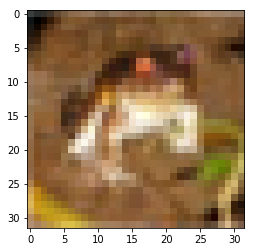

In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(x_train[0])      # 개구리
print(y_train[0])           # 개구리

[9]


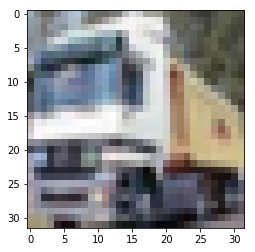

In [4]:
plt.imshow(x_train[1])      # 트럭
print(y_train[1])           # 트럭

[9]


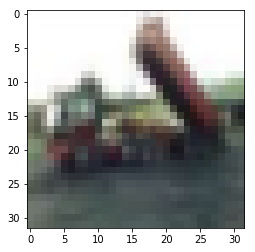

In [5]:
plt.imshow(x_train[2])      # 트럭
print(y_train[2])           # 트럭

In [0]:
# Convert class vectors to binary class matrices.
# One-hot 인코딩
y_train = keras.utils.to_categorical(y_train, num_classes)  # num_classes = 10
y_test = keras.utils.to_categorical(y_test, num_classes)    # num_classes = 10

Keras를 이용하여 모델 구성하기!

In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255



In [0]:
if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        steps_per_epoch = x_train.shape[0] // batch_size,
                        validation_data=(x_test, y_test),
                        workers=4)



In [0]:
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])